In [201]:
import pandas as pd
import numpy as np
import folium
import math as mt
import datetime
import calendar
import time
import seaborn as sns
from folium import plugins
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from matplotlib import cm
from matplotlib import animation
import warnings
warnings.filterwarnings('ignore')
print(sns.axes_style)


<function axes_style at 0x000001D722789798>


In [202]:
df = pd.read_csv("NY_Taxi_Rich.csv")

In [203]:
df.head()

,id,vendorId,passengerCount,year,month,day,hour,minute,second,season,...,snow,startLatitude,startLongitude,endLatitude,endLongitude,flag,drivingDistance,drivingTime,geoDistance,tripDuration
0,id2875421,2,1,2016,3,14,17,24,55,Spring,...,0,40.77,-73.98,40.77,-73.96,N,1.92,135.00,1.50,455
1,id2377394,1,1,2016,6,12,0,43,35,Summer,...,0,40.74,-73.98,40.73,-74.00,N,2.51,165.00,1.81,663
2,id3858529,2,1,2016,1,19,11,35,24,Winter,...,0,40.76,-73.98,40.71,-74.01,N,9.89,480.00,6.38,2124
3,id3504673,2,1,2016,4,6,19,32,31,Spring,...,0,40.72,-74.01,40.71,-74.01,N,2.08,165.00,1.48,429
4,id2181028,2,1,2016,3,26,13,30,55,Spring,...,0,40.79,-73.97,40.78,-73.97,N,1.63,94.00,1.19,435


In [204]:
df.isnull().sum()

id                    0
vendorId              0
passengerCount        0
year                  0
month                 0
day                   0
hour                  0
minute                0
second                0
season                0
dayName               0
dayPeriod             0
temperature           0
rain                  0
snow                  0
startLatitude         0
startLongitude        0
endLatitude           0
endLongitude          0
flag                  0
drivingDistance    4847
drivingTime        1963
geoDistance           0
tripDuration          0
dtype: int64

In [205]:
newDf = df.dropna()

In [206]:
newDf.isnull().sum()


id                 0
vendorId           0
passengerCount     0
year               0
month              0
day                0
hour               0
minute             0
second             0
season             0
dayName            0
dayPeriod          0
temperature        0
rain               0
snow               0
startLatitude      0
startLongitude     0
endLatitude        0
endLongitude       0
flag               0
drivingDistance    0
drivingTime        0
geoDistance        0
tripDuration       0
dtype: int64

In [207]:
newDes = newDf[['passengerCount','hour','startLatitude','startLongitude','endLatitude','endLongitude','drivingDistance']].copy()

In [208]:
pd.options.display.float_format = "{:.2f}".format
newDes.describe()

,passengerCount,hour,startLatitude,startLongitude,endLatitude,endLongitude,drivingDistance
count,2078931.00,2078931.00,2078931.00,2078931.00,2078931.00,2078931.00,2078931.00
mean,1.66,13.61,40.75,-73.97,40.75,-73.97,4.50
std,1.31,6.40,0.03,0.07,0.03,0.07,5.37
min,0.00,0.00,36.03,-121.93,36.03,-121.93,0.00
25%,1.00,9.00,40.74,-73.99,40.74,-73.99,1.68
50%,1.00,14.00,40.75,-73.98,40.75,-73.98,2.75
75%,2.00,19.00,40.77,-73.97,40.77,-73.96,4.92
max,9.00,23.00,43.91,-70.85,48.86,-67.50,1210.17


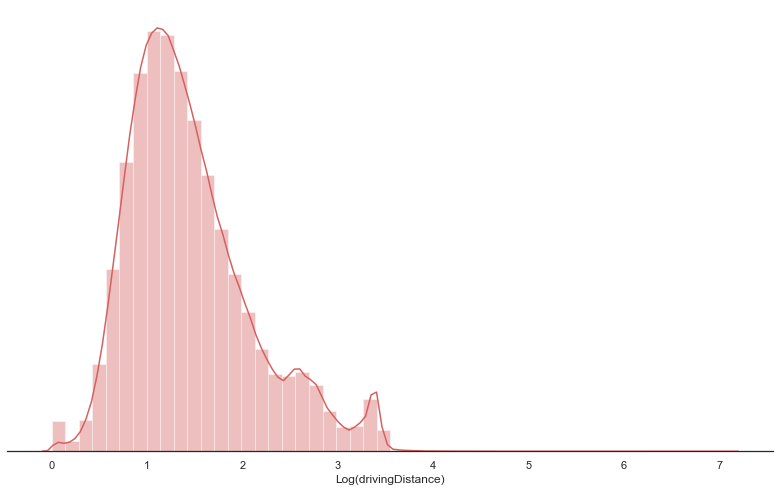

In [209]:
%matplotlib inline
start = time.time()
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 1, figsize=(11, 7), sharex=True)
sns.despine(left=True)
sns.distplot(np.log(df['drivingDistance'].values+1), axlabel = 'Log(drivingDistance)', label = 'log(drivingDistance)', bins = 50, color="r")
plt.setp(axes, yticks=[])
plt.tight_layout()
end = time.time()
plt.show()

In [210]:
df


,id,vendorId,passengerCount,year,month,day,hour,minute,second,season,...,snow,startLatitude,startLongitude,endLatitude,endLongitude,flag,drivingDistance,drivingTime,geoDistance,tripDuration
0,id2875421,2,1,2016,3,14,17,24,55,Spring,...,0,40.77,-73.98,40.77,-73.96,N,1.92,135.00,1.50,455
1,id2377394,1,1,2016,6,12,0,43,35,Summer,...,0,40.74,-73.98,40.73,-74.00,N,2.51,165.00,1.81,663
2,id3858529,2,1,2016,1,19,11,35,24,Winter,...,0,40.76,-73.98,40.71,-74.01,N,9.89,480.00,6.38,2124
3,id3504673,2,1,2016,4,6,19,32,31,Spring,...,0,40.72,-74.01,40.71,-74.01,N,2.08,165.00,1.48,429
4,id2181028,2,1,2016,3,26,13,30,55,Spring,...,0,40.79,-73.97,40.78,-73.97,N,1.63,94.00,1.19,435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2083773,id3008929,1,1,2016,1,1,0,2,52,Winter,...,0,40.73,-74.00,40.73,-74.00,N,1.14,93.00,966.30,-1
2083774,id3700764,1,1,2016,1,1,0,1,52,Winter,...,0,40.74,-74.01,40.78,-73.95,N,8.20,480.00,6.20,-1
2083775,id2568735,1,2,2016,1,1,0,1,24,Winter,...,0,40.76,-73.97,40.75,-73.88,N,9.71,525.00,8.17,-1
2083776,id1384355,1,1,2016,1,1,0,0,28,Winter,...,0,40.73,-73.98,40.89,-73.85,N,25.41,1020.00,20.37,-1


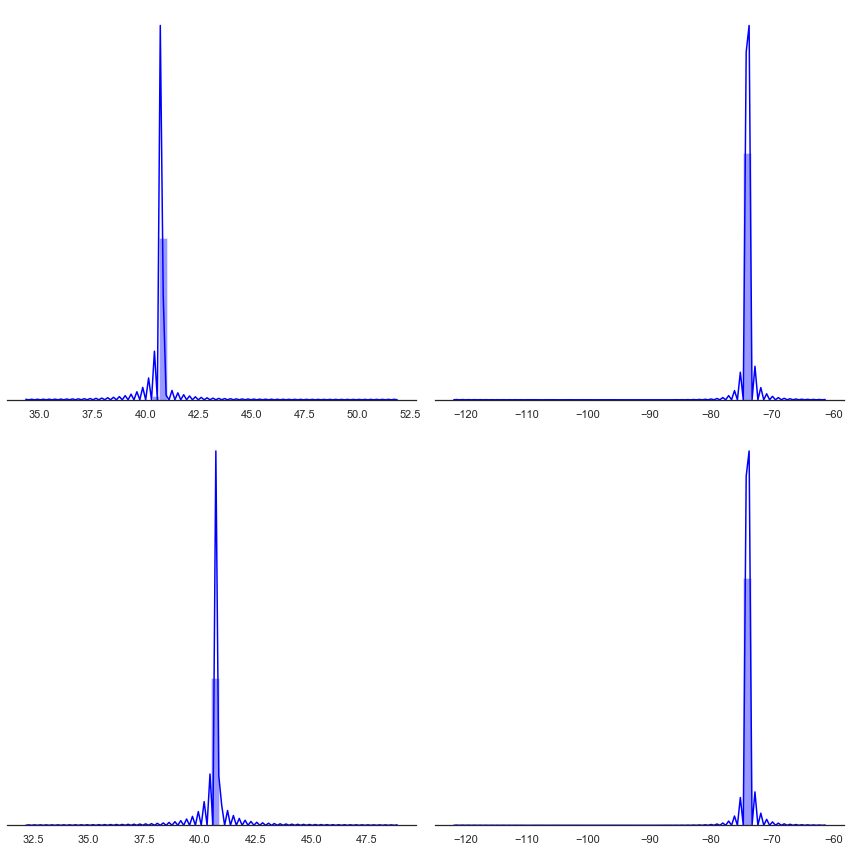

In [211]:
start = time.time()
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(12, 12), sharex=False, sharey = False)
sns.despine(left=True)
sns.distplot(df['startLatitude'].values, label = 'startLatitude',color="blue",bins = 50, ax=axes[0,0])
sns.distplot(df['startLongitude'].values, label = 'startLongitude',color="blue",bins =50, ax=axes[0,1])
sns.distplot(df['endLatitude'].values, label = 'endLatitude',color="blue",bins =50, ax=axes[1, 0])
sns.distplot(df['endLongitude'].values, label = 'endLongitude',color="blue",bins =50, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()
end = time.time()
plt.show()

In [212]:
new = newDf[['id','passengerCount','month','day','hour','second','season','dayName','dayPeriod','startLatitude','startLongitude','endLatitude','endLongitude','drivingDistance']].copy()

In [213]:
new.columns


Index(['id', 'passengerCount', 'month', 'day', 'hour', 'second', 'season',
       'dayName', 'dayPeriod', 'startLatitude', 'startLongitude',
       'endLatitude', 'endLongitude', 'drivingDistance'],
      dtype='object')

In [214]:
new.head()

,id,passengerCount,month,day,hour,second,season,dayName,dayPeriod,startLatitude,startLongitude,endLatitude,endLongitude,drivingDistance
0,id2875421,1,3,14,17,55,Spring,Monday,afternoon,40.77,-73.98,40.77,-73.96,1.92
1,id2377394,1,6,12,0,35,Summer,Sunday,lateNight,40.74,-73.98,40.73,-74.00,2.51
2,id3858529,1,1,19,11,24,Winter,Tuesday,morning,40.76,-73.98,40.71,-74.01,9.89
3,id3504673,1,4,6,19,31,Spring,Wednesday,evening,40.72,-74.01,40.71,-74.01,2.08
4,id2181028,1,3,26,13,55,Spring,Saturday,afternoon,40.79,-73.97,40.78,-73.97,1.63


In [215]:
new.tail()

,id,passengerCount,month,day,hour,second,season,dayName,dayPeriod,startLatitude,startLongitude,endLatitude,endLongitude,drivingDistance
2083773,id3008929,1,1,1,0,52,Winter,Friday,lateNight,40.73,-74.00,40.73,-74.00,1.14
2083774,id3700764,1,1,1,0,52,Winter,Friday,lateNight,40.74,-74.01,40.78,-73.95,8.20
2083775,id2568735,2,1,1,0,24,Winter,Friday,lateNight,40.76,-73.97,40.75,-73.88,9.71
2083776,id1384355,1,1,1,0,28,Winter,Friday,lateNight,40.73,-73.98,40.89,-73.85,25.41
2083777,id0621643,2,1,1,0,22,Winter,Friday,lateNight,40.72,-73.98,40.77,-73.97,8.29


In [216]:
new.isnull().sum()

id                 0
passengerCount     0
month              0
day                0
hour               0
second             0
season             0
dayName            0
dayPeriod          0
startLatitude      0
startLongitude     0
endLatitude        0
endLongitude       0
drivingDistance    0
dtype: int64

In [217]:
new.startLatitude.mean(),new.startLongitude.mean()

(40.75096677615561, -73.97359064277997)

In [218]:
new.endLatitude.mean(),new.endLongitude.mean()

(40.75185468351025, -73.97347636478563)

In [219]:
def get_base_map(new):
    return folium.Map(location=[new.startLatitude.mean(),
                             new.startLongitude.mean()],
                   zoom_start=9,tiles='cartodbpositron')

base = get_base_map(new)
base

In [220]:
startAr = new[['startLatitude', 'startLongitude']][:35000].as_matrix()

get_base_map(new).add_child(plugins.HeatMap(startAr, radius=30, max_val=500))

In [221]:
newDfSort = new.sort_values(by='drivingDistance', ascending = False)

In [222]:
newDfSort = newDfSort[newDfSort.drivingDistance < 500]

In [223]:
newDfSort.head(10)

,id,passengerCount,month,day,hour,second,season,dayName,dayPeriod,startLatitude,startLongitude,endLatitude,endLongitude,drivingDistance
1723646,id2165456,1,4,14,20,17,Spring,Thursday,night,40.75,-73.99,43.14,-72.59,360.99
377068,id0116374,1,4,2,20,19,Spring,Saturday,night,40.72,-74.01,38.95,-76.96,358.28
1883719,id3705290,1,3,1,1,58,Spring,Tuesday,lateNight,40.87,-73.91,42.67,-73.71,246.11
1301396,id1216866,1,3,26,22,54,Spring,Saturday,night,40.77,-73.98,40.24,-76.14,243.31
1540578,id2568881,1,6,6,11,37,Summer,Monday,morning,40.76,-74.00,42.65,-73.76,239.60
114376,id1311087,3,2,29,12,29,Winter,Monday,afternoon,39.80,-75.46,40.71,-73.80,207.52
1416336,id3795134,3,3,21,20,0,Spring,Monday,night,39.92,-75.24,40.61,-73.92,167.92
1849452,id0268199,1,3,10,16,30,Spring,Thursday,afternoon,41.67,-74.68,40.75,-73.98,151.79
14502,id1092161,1,4,15,22,8,Spring,Friday,night,40.64,-73.78,41.31,-72.71,149.88
978647,id0687776,1,4,28,20,43,Spring,Thursday,evening,40.75,-73.99,41.39,-72.91,131.62


In [224]:
startAr = newDfSort[['startLatitude', 'startLongitude']][:1000].as_matrix()
get_base_map(newDfSort).add_child(plugins.HeatMap(startAr, radius=30, max_val=500))

In [225]:
startAr = newDfSort[['endLatitude', 'endLongitude']][:1000].as_matrix()
get_base_map(newDfSort).add_child(plugins.HeatMap(startAr, radius=30, max_val=500))

In [226]:
newDfSort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2078926 entries, 1723646 to 1721253
Data columns (total 14 columns):
id                 object
passengerCount     int64
month              int64
day                int64
hour               int64
second             int64
season             object
dayName            object
dayPeriod          object
startLatitude      float64
startLongitude     float64
endLatitude        float64
endLongitude       float64
drivingDistance    float64
dtypes: float64(5), int64(5), object(4)
memory usage: 237.9+ MB


In [227]:
newDfSort.groupby('season')['dayName'].value_counts()

season  dayName  
Spring  Saturday     166624
        Friday       161954
        Tuesday      158801
        Thursday     157371
        Wednesday    151961
        Sunday       145865
        Monday       136001
Summer  Thursday      58280
        Wednesday     56150
        Friday        47438
        Saturday      46741
        Tuesday       43623
        Monday        40988
        Sunday        40691
Winter  Friday       109668
        Saturday     101008
        Thursday      95652
        Sunday        91746
        Wednesday     91187
        Monday        90162
        Tuesday       87015
Name: dayName, dtype: int64

In [228]:
newDfSort.groupby('season')['dayPeriod'].value_counts()

season  dayPeriod
Spring  afternoon    317230
        morning      275618
        night        204801
        evening      166210
        lateNight    114718
Summer  afternoon     95592
        morning       86934
        night         64353
        evening       50061
        lateNight     36971
Winter  afternoon    200763
        morning      168307
        night        122068
        evening      104089
        lateNight     71211
Name: dayPeriod, dtype: int64

<Figure size 432x288 with 0 Axes>

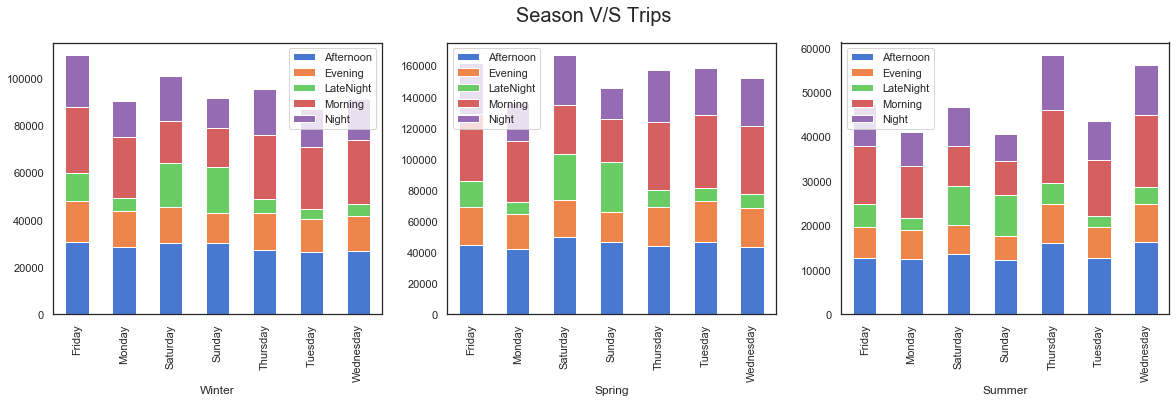

In [229]:
fig = plt.figure()

fig.tight_layout(rect=[0, 10, 1, 20])

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20,5))
fig.suptitle('Season V/S Trips', fontsize=20)
newDfSort[newDfSort['season'] == 'Winter'].groupby(['dayName', 'dayPeriod']).size().unstack().plot(ax=axes[0],kind='bar', stacked=True)
axes[0].set_xlabel('Winter')
newDfSort[newDfSort['season'] == 'Spring'].groupby(['dayName', 'dayPeriod']).size().unstack().plot(ax=axes[1],kind='bar', stacked=True)
axes[1].set_xlabel('Spring')
newDfSort[newDfSort['season'] == 'Summer'].groupby(['dayName', 'dayPeriod']).size().unstack().plot(ax=axes[2],kind='bar', stacked=True)
axes[2].set_xlabel('Summer')
# ax[0].legend(custom_lines, ['', 'Medium', 'Hot'])
axes[0].legend( ['Afternoon', 'Evening', 'LateNight','Morning','Night'])
axes[1].legend( ['Afternoon', 'Evening', 'LateNight','Morning','Night'])
axes[2].legend( ['Afternoon', 'Evening', 'LateNight','Morning','Night'])
plt.show()